In [1]:
from warnings import simplefilter
simplefilter(action='ignore',category=FutureWarning)

In [2]:
from __future__ import print_function
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import arma_order_select_ic
from statsmodels.tsa.arima_model import ARIMA

In [3]:
#绝大多数情况，会从.txt/.xlsx/.csv文件中读取，在此为简化过程，以列表形式给定数据
dta=[3345.0, 1905.0, 3860.0, 4492.0, 5726.0, 4992.0, 3443.0, 4053.0, 5105.0, 4236.0, 3673.0, 1932.0, 2685.0, 953.0, 4285.0, 4421.0, 4301.0, 4089.0]
# dta=[3345.0, 2905.0, 3860.0, 4492.0, 5726.0, 4992.0, 3443.0, 4053.0, 5105.0, 4236.0, 3673.0, 2932.0, 2685.0, 2953.0, 4285.0, 4421.0, 4301.0, 4089.0]
# dta=[363.0, 246.0, 233.0, 226.0, 600.0, 900.0, 5888.682999999999, 6683.379000000003, 7448.271000000001, 6303.769999999998, 4758.706000000001, 4897.457999999998, 4133.019000000001, 1620.1229999999998, 4640.634000000003, 3675.825, 4107.325999999999, 2162.243]

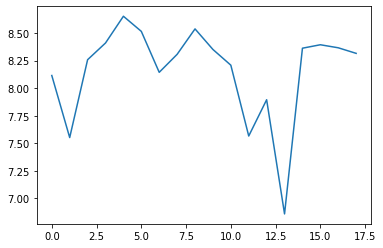

In [4]:
#转换数据类型，并画出初始序列的变化趋势
# dta=pd.Series(dta)
dta=pd.Series(np.log(dta))
plt.plot(dta)

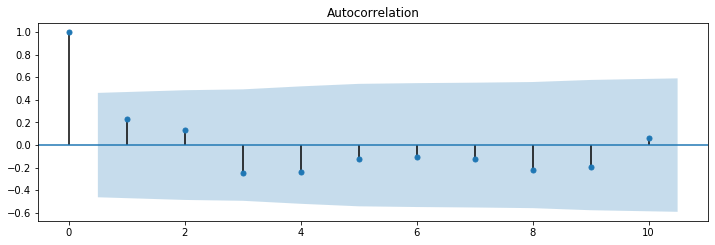

In [5]:
#画出自相关图
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(dta,lags=10,ax=ax1) #lags代表滞后的阶数

In [6]:
#平稳性检测
temp=np.array(dta)
# temp=np.diff(temp)
t=sm.tsa.stattools.adfuller(temp)#ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-3.04721
p-value,0.0307149
Lags Used,0
Number of Observations Used,17
Critical Value(1%),-3.88927
Critical Value(5%),-3.05436
Critical Value(10%),-2.66698


In [7]:
#经过ADF检验，我们发现p值并未小于0.05，且T检验值未小于10%
#综上所述，已知的时间序列数据为非平稳序列
#下面采用ARIMA序列对数据进行处理

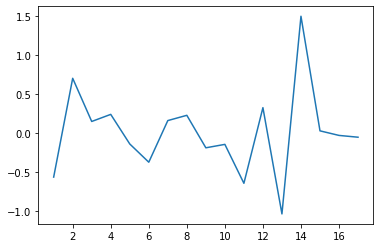

In [8]:
#进行差分
ddta=dta.diff(1).dropna()
plt.plot(ddta)

G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


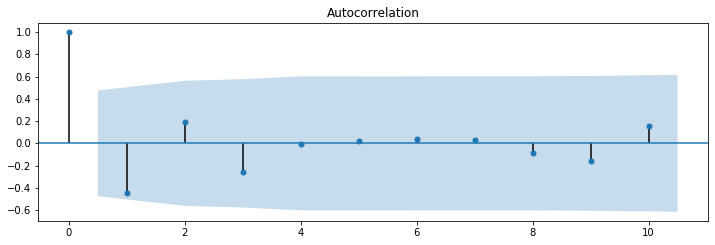

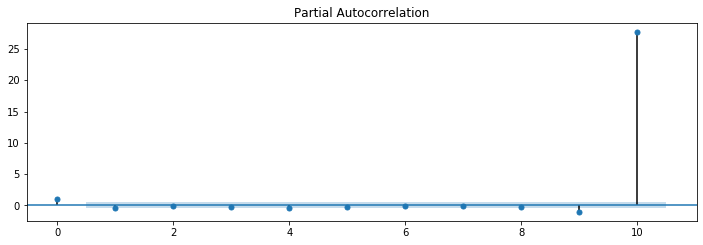

In [9]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(ddta,lags=10,ax=ax1) #lags代表滞后的阶数
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(212)
fig=plot_pacf(ddta,lags=10,ax=ax1) #lags代表滞后的阶数

In [10]:
#平稳性检测
temp=np.array(ddta)
# temp=np.diff(temp)
t=sm.tsa.stattools.adfuller(temp)#ADF检验
output=pd.DataFrame(index=['Test Statistic Value', "p-value", "Lags Used", "Number of Observations Used","Critical Value(1%)","Critical Value(5%)","Critical Value(10%)"],columns=['value'])
output['value']['Test Statistic Value'] = t[0]
output['value']['p-value'] = t[1]
output['value']['Lags Used'] = t[2]
output['value']['Number of Observations Used'] = t[3]
output['value']['Critical Value(1%)'] = t[4]['1%']
output['value']['Critical Value(5%)'] = t[4]['5%']
output['value']['Critical Value(10%)'] = t[4]['10%']
output

,value
Test Statistic Value,-6.33818
p-value,2.79692e-08
Lags Used,0
Number of Observations Used,16
Critical Value(1%),-3.92402
Critical Value(5%),-3.0685
Critical Value(10%),-2.67389


In [11]:
#对一阶差分后的序列做白噪声检验
#p值为第二项
from statsmodels.stats.diagnostic import acorr_ljungbox
print(u'差分序列的白噪声检验结果：',acorr_ljungbox(ddta, lags= 1)) #返回统计量和 p 值

差分序列的白噪声检验结果： (array([4.03499639]), array([0.04456577]))


In [12]:
order=sm.tsa.stattools.arma_order_select_ic(ddta,max_ar=4,
                             max_ma=4,ic=['aic','bic','hqic'])
order

G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:716: RuntimeWarning: divide by zero encountered in true_divide
  invmacoefs = -np.log((1-macoefs)/(1+macoefs))
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\base\model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
G:\MyDownLoads\Anaconda3\lib\site-packag

{'aic':            0          1          2          3          4
 0  31.592377  29.099560  30.147807  30.137618  32.100080
 1  29.718828  31.705149  31.678718  32.119371  34.133525
 2  31.715280  31.444150  32.980641  31.750485  32.261430
 3  33.058446  31.832076        NaN  32.546473  34.962213
 4  32.544913  32.869743  34.636916  36.566377  36.546828,
 'bic':            0          1          2          3          4
 0  33.258804  31.599200  33.480660  34.303685  37.099360
 1  32.218468  35.038003  35.844784  37.118651  39.966018
 2  35.048134  35.610217  37.979921  37.582978  38.927137
 3  37.224513  36.831357        NaN  39.212179  42.461133
 4  37.544193  38.702236  41.302623  44.065297  44.878962,
 'hqic':            0          1          2          3          4
 0  31.758023  29.348029  30.479099  30.551733  32.597019
 1  29.967297  32.036442  32.092833  32.616310  34.713286
 2  32.046573  31.858265  33.477579  32.330246  32.924015
 3  33.472562  32.329015        NaN  33.209057  

In [14]:
order=(0,1,1)
train=ddta[:-3]
test=ddta[-3:]
tempModel=ARIMA(ddta,order).fit()
tempModel.summary2()

G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: ARIMA
=================================================================
Model:              ARIMA            BIC:                 38.0814
Dependent Variable: D.y              Log-Likelihood:      -14.882
Date:               2020-10-22 19:10 Scale:               1.0000 
No. Observations:   16               Method:              css-mle
Df Model:           2                Sample:              1      
Df Residuals:       14                                    7      
Converged:          1.0000           S.D. of innovations: 0.561  
No. Iterations:     33.0000          HQIC:                35.882 
AIC:                35.7637                                      
------------------------------------------------------------------
               Coef.   Std.Err.     t     P>|t|    [0.025   0.975]
------------------------------------------------------------------
const          0.0026    0.0278   0.0941  0.9250  -0.0519   0.0571
ma.L1.D.y     -1.0000    0.1644  -6.0821  0.0000  -1.3222  -0.6777
-------------------------------------------------------------------------
                Real          Imaginary         Modulus         Frequency
-------------------------------------------------------------------------
MA.1           1.0000            0.0000          1.0000            0.0000
=================================================================

"""

In [15]:
print(tempModel.forecast(10))
print(test)

(array([0.04054858, 0.04316348, 0.04577838, 0.04839328, 0.05100819,
       0.05362309, 0.05623799, 0.05885289, 0.0614678 , 0.0640827 ]), array([0.56139086, 0.56139086, 0.56139086, 0.56139086, 0.56139086,
       0.56139086, 0.56139086, 0.56139086, 0.56139086, 0.56139086]), array([[-1.05975728,  1.14085444],
       [-1.05714238,  1.14346934],
       [-1.05452748,  1.14608424],
       [-1.05191258,  1.14869915],
       [-1.04929768,  1.15131405],
       [-1.04668278,  1.15392895],
       [-1.04406787,  1.15654386],
       [-1.04145297,  1.15915876],
       [-1.03883807,  1.16177367],
       [-1.03622317,  1.16438857]]))
15    0.031245
16   -0.027518
17   -0.050547
dtype: float64


3


G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


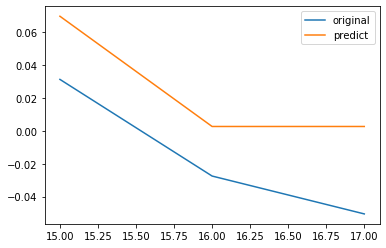

In [16]:
predicts = tempModel.predict(16, 18, dynamic=True)
print (len(predicts))
comp = pd.DataFrame()
comp['original'] = test
comp['predict'] = predicts
comp.plot()

In [17]:
# pmax = int(len(ddta) / 10)    #一般阶数不超过 length /10
# qmax = int(len(ddta) / 10)
pmax = 6    #一般阶数不超过 length /10
qmax = 6
bic_matrix = []
for p in range(1,(pmax +1)):
    temp= []
    for q in range(1,(qmax+1)):
        try:
            temp.append(ARIMA(ddta, (p, 1, q)).fit().bic)
        except:
            temp.append(None)
        bic_matrix.append(temp)

bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
print(bic_matrix)
print("*************************************************************")
p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1

G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1620: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided a

       0     1     2     3     4     5
0   None  None  None  None  None  None
1   None  None  None  None  None  None
2   None  None  None  None  None  None
3   None  None  None  None  None  None
4   None  None  None  None  None  None
5   None  None  None  None  None  None
6   None  None  None  None  None  None
7   None  None  None  None  None  None
8   None  None  None  None  None  None
9   None  None  None  None  None  None
10  None  None  None  None  None  None
11  None  None  None  None  None  None
12  None  None  None  None  None  None
13  None  None  None  None  None  None
14  None  None  None  None  None  None
15  None  None  None  None  None  None
16  None  None  None  None  None  None
17  None  None  None  None  None  None
18  None  None  None  None  None  None
19  None  None  None  None  None  None
20  None  None  None  None  None  None
21  None  None  None  None  None  None
22  None  None  None  None  None  None
23  None  None  None  None  None  None
24  None  None  None  Non

G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
G:\MyDownLoads\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:214: ValueWarning: An unsup

TypeError: reduction operation 'argmin' not allowed for this dtype